### Offline Test

### Candidate: Kevin Ying


#### Project: Image Classification ( 10 Class) on "Street View House Number (SVHN)"

#### Dataset: http://ufldl.stanford.edu/housenumbers/

#### Method: <font color="blue"> Deep Learning Convolution by Turi GraphLab</font>
#### Content:
 - I. Import Dataset and Libraries
 - II. Convert Images format (Array --> JPEG) and save files locally
 - III. Reload images into GraphLab SFrame format
 - IV. Merges Class labels into SFrame
 - V. Save SFrame locally for future use
 - VI. Split Dataset into Train and Validation Set
 - VII. Modeling by Turi GraphLab Convolution Network
 
 



#### Model Summary Table

Based on the following summary table, the three models are very close in terms of Overall Accuracy. The baseline model (i.e. Conv_#1) is built by the default setting from the GraphLab, the rest of models are pruned based on the #1 model. When we observe the Accuracy, we are able to see that there is overfitting issue on the first two models. For that reason, regularization L2 function was attempted on the model#2 or beyond. The overfitting issue was not improved on the model #2 (train:0.83 vs valid:0.88), so the higher L2 value which was 0.005 was set for the #3 model. The result showed that the L2 value actually lowered the overfitting issue (i.e. train:0.83 vs valid:0.84). When we used the model#3 to measure the performance on the test set, the recall values on most of the classes are above 90%. 

In this case, I would propose to continue to iterate the similar configurations with some other setting shown below to test on the outcomes:

- Add Dropout layers to continue to tackle the overfitting problem
- Increase the Convolutional layers to the existing configuration to capture more features from the original data
- Lower the Learning rate with higher epoches set for training process

In [22]:
sf=gl.SFrame({ "Model": ["Conv_#1","Conv_#2","Conv_#3", "Conv_#4"],
              "Filter Size": [3,3,3,3],
              "Stride": [2,2,2,1],
              "Learning Rate": [0.001,0.001,0.001, 0.001],
              "Batch Size": [100,100,100,200], 
              "Regularization L2": [None, 0.001,0.005, 0.01], 
              "Train_Acc": [0.8, 0.82, 0.83, np.nan ], 
              "Valid_Acc": [0.83, 0.88, 0.84, np.nan]})
sf["Model","Filter Size" ,"Stride","Batch Size", "Learning Rate", "Regularization L2", "Train_Acc" , "Valid_Acc"]

Model,Filter Size,Stride,Batch Size,Learning Rate,Regularization L2,Train_Acc,Valid_Acc
Conv_#1,3,2,100,0.001,None,0.8,0.83
Conv_#2,3,2,100,0.001,0.001,0.82,0.88
Conv_#3,3,2,100,0.001,0.005,0.83,0.84
Conv_#4,3,1,200,0.001,0.01,nan,nan


#### Model Summary Chart

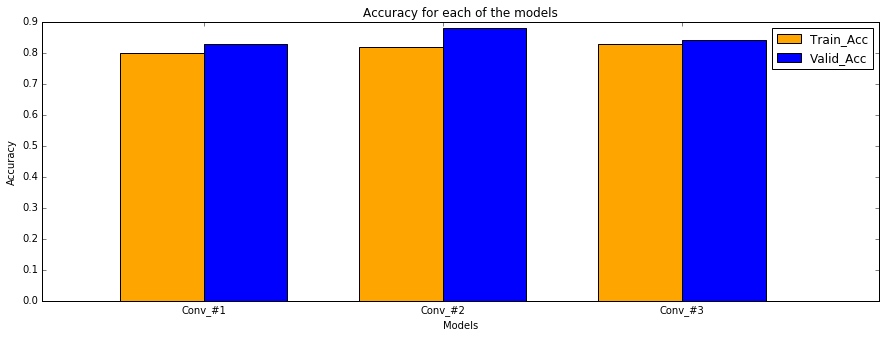

In [48]:
labels = ["Conv_#1", "Conv_#2", "Conv_#3"]
train_Acc = [0.8,0.82,0.83]
test_Acc = [0.83, 0.88,0.84]

x=np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,5))

train_rect = ax.bar(x-width/2, train_Acc, width, label="Train_Acc", color="orange") 
test_rect = ax.bar(x+width/2, test_Acc, width, label="Valid_Acc") 

ax.set_ylabel("Accuracy")
ax.set_xlabel("Models")
ax.set_xticks(x+width/2)
ax.set_xticklabels(labels)
ax.set_title("Accuracy for each of the models")
ax.legend()

plt.show()

#### Recall Measurment on the best Model #3

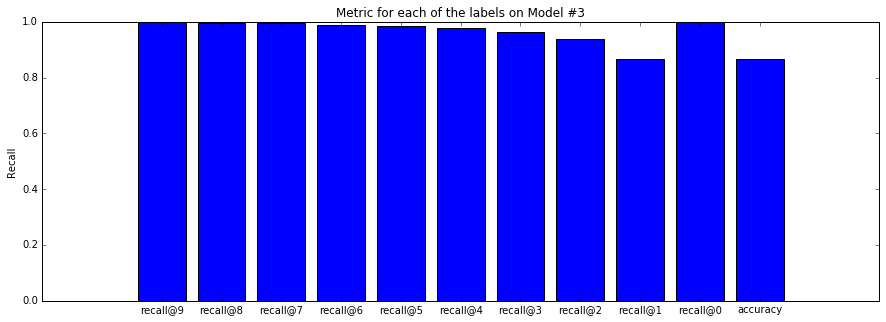

In [67]:
'''The following Recall values are collected from the below Model #3 section under the name"m3" '''
d = {'accuracy': 0.8671935796737671,
 'recall@1': 0.8671935796737671,
 'recall@0': 1.0,
 'recall@2': 0.937384843826294,
 'recall@3': 0.9633209109306335,
 'recall@4': 0.9766165614128113,
 'recall@5': 0.9845612049102783,
 'recall@6': 0.9898576140403748,
 'recall@7': 0.9940483570098877,
 'recall@8': 0.996833086013794,
 'recall@9': 0.998730480670929}

labels=d.keys()
height=d.values()

x=np.arange(len(labels))
width =0.8


fig, ax = plt.subplots(figsize=(15,5))
m3_test_rect=ax.bar(x-width/2, height, width, color="blue") 

ax.set_ylabel("Recall")
ax.set_xticks(x)#+width/2)
ax.set_xticklabels(labels)
ax.set_title("Metric for each of the labels on Model #3")
ax.legend()

plt.show()


#### Result Discusion / Future Work
The Convolution algorithm is very handful tool for imaging classification projects. The biggest challenge of this project is time management due to leaking of computation power. In order to obtain a better result on modeling, the number of epoch (i.e. iteration) is necessary to be adjust and test. The reason is that the weights on the network are updated on every epoch in order to lower the error (i.e. loss function). So that the higher value of epoch implies more errors would be corrected. For the above reason, the higher value of epoch consumes more computation power which takes more time on the model building process. The best model which generates about 86% of overall accuracy on the model which 50 iterations (i.e. Epoch) also solves the overfitting problem.  

The future work I would recommend to figure the way to launch the modeling process on the Cloud platform with Turi GraphLab Library in order to speed up the computation process. That way is able to generate better model performance as well as saves computation resources.

### The following is the Pipline of Modeling Process

### Loading Libraries

In [1]:
import graphlab as gl
from graphlab import SFrame
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1563381304.log


This non-commercial license of GraphLab Create for academic use is assigned to kying@mail.depaul.edu and will expire on July 15, 2020.


/Users/dataguy/anaconda2/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Loading Dataset

In [6]:
train=sio.loadmat("./data/train_32x32.mat")
test=sio.loadmat("./data/train_32x32.mat")


Xtrain=np.transpose(train["X"], axes=(3,0,1,2))
ytrain = train["y"].reshape(1,-1)[0]
Xtest=np.transpose(test["X"], axes=(3,0,1,2))
ytest = test["y"].reshape(1,-1)[0]

print "Train set: ",Xtrain.shape, ytrain.shape
print "Test set: " ,Xtest.shape, ytest.shape

Train set:  (73257, 32, 32, 3) (73257,)
Test set:  (73257, 32, 32, 3) (73257,)


### Save Image in JPEG format

In [11]:
from PIL import Image

for i in range(0,Xtrain.shape[0]):Image.fromarray(Xtrain[i][:,:,2]).save("./data/img/train/%d_%d.jpeg"%(i, ytrain[i]))
for i in range(0,Xtest.shape[0]):Image.fromarray(Xtest[i][:,:,2]).save("./data/img/test/%d_%d.jpeg"%(i, ytest[i]))

### Load JPEG Images to graphlab.SFrame (Train and Test)

In [150]:
XtrainGL=gl.image_analysis.load_images("./data/img/train", 
                                      format='auto', 
                                          with_path=True, 
                                          recursive=True, 
                                          ignore_failure=True, 
                                          random_order=True)

Read 15729 images in 5.00006 secs	speed: 3145.76 file/sec

Read 32140 images in 10.0002 secs	speed: 3282.1 file/sec

Read 47566 images in 15.0005 secs	speed: 3085.01 file/sec

Read 60829 images in 20.0008 secs	speed: 2652.42 file/sec

In [151]:
XtestGL=gl.image_analysis.load_images("./data/img/test", 
                                      format='auto', 
                                          with_path=True, 
                                          recursive=True, 
                                          ignore_failure=True, 
                                          random_order=True)

Read 15183 images in 5.00035 secs	speed: 3036.39 file/sec

Read 29684 images in 10.0004 secs	speed: 2900.14 file/sec

Read 44837 images in 15.0007 secs	speed: 3030.45 file/sec

Read 58839 images in 20.0007 secs	speed: 2800.39 file/sec

### Combine the Class Label to the SFrame

In [152]:
XtrainGL["label"]=XtrainGL["path"].apply(lambda x: x.split("_")[-1].split(".")[0])
XtrainGL["label"] = XtrainGL["label"].astype(int)
XtestGL["label"]=XtestGL["path"].apply(lambda x: x.split("_")[-1].split(".")[0])
XtestGL["label"] = XtestGL["label"].astype(int)

In [153]:
XtrainGL=XtrainGL["image", "label"]
XtestGL=XtestGL["image", "label"]

### Save the data for future use

In [154]:
XtrainGL.save('./data/train.sframe')
XtestGL.save('./data/test.sframe')

### Load the data for Training

In [49]:
# Load the data
train =  gl.SFrame('./data/train.sframe')
test=  gl.SFrame('./data/test.sframe')
train.shape, test.shape

((73257, 2), (73257, 2))

### Make a Train - Validation split

In [69]:
train_data, valid_data = train.random_split(0.67, seed =0 )
train_data.shape, valid_data.shape

((49149, 2), (24108, 2))

### Class Distribution on Train and Validation Set

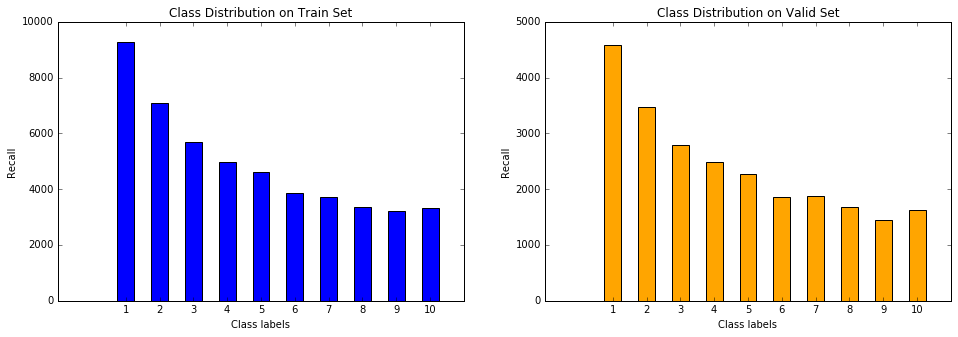

In [101]:
from collections import Counter

fig=plt.figure(figsize =(16,5))
#############################################
d=Counter(train_data["label"])
d=dict(d)
labels=d.keys()
height=d.values()
x=np.arange(len(labels))
width =0.5
ax=fig.add_subplot(1,2,1)
m3_test_rect=ax.bar(x-width/2, height, width, color="blue") 

ax.set_ylabel("Recall")
ax.set_xlabel("Class labels")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Class Distribution on Train Set")
ax.legend()

##################################################
d=Counter(valid_data["label"])
d=dict(d)
labels=d.keys()
height=d.values()
ax2=fig.add_subplot(1,2,2)
m3_test_rect=ax2.bar(x-width/2, height, width, color="orange") 

ax2.set_ylabel("Recall")
ax2.set_xlabel("Class labels")
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_title("Class Distribution on Valid Set")
ax2.legend()


## Modelling Process begins here
### Create network by using deeplearning.create

### Model#1

In [ ]:
net = gl.deeplearning.create(train, target='label')

In [167]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 30)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 10
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 45700    | 10.010818    | 0.220788          |                     | 4565.062012     |

| 1         | 49100    | 13.187236    | 0.228065          | 0.383218            | 1070.387817     |

| 2         | 46500    | 23.195441    | 0.428989          |                     | 4646.242676     |

| 2         | 49100    | 26.214553    | 0.436008          | 0.619926            | 861.179993      |

| 3         | 46300    | 36.216437    | 0.605745          |                     | 4629.178711     |

| 3         | 49100    | 39.294688    | 0.608248          | 0.737970            | 909.607178      |

| 4         | 46700    | 49.306612    | 0.669979          |                     | 4664.483398     |

| 4         | 49100    | 52.309742    | 0.670998          | 0.753362            | 799.166077      |

| 5         | 46500    | 62.321338    | 0.703441          |                     | 4645.006348     |

| 5         | 49100    | 65.442249    | 0.704420          | 0.774711            | 833.089661      |

| 6         | 44300    | 75.446359    | 0.717788          |                     | 4428.203613     |

| 6         | 49100    | 79.269597    | 0.719572          | 0.775498            | 1255.480103     |

| 7         | 43800    | 89.288854    | 0.731872          |                     | 4371.602051     |

| 7         | 49100    | 93.009074    | 0.733157          | 0.792213            | 1424.646484     |

| 8         | 45900    | 103.015412   | 0.743028          |                     | 4587.133789     |

| 8         | 49100    | 106.221054   | 0.743279          | 0.796227            | 998.239868      |

| 9         | 46000    | 116.228069   | 0.754630          |                     | 4596.819336     |

| 9         | 49100    | 119.360993   | 0.754725          | 0.805412            | 989.490723      |

| 10        | 46200    | 129.371972   | 0.757662          |                     | 4614.985352     |

| 10        | 49100    | 132.499160   | 0.757434          | 0.809508            | 927.350464      |

| 11        | 45400    | 142.514669   | 0.761872          |                     | 4533.012695     |

| 11        | 49100    | 145.822003   | 0.762281          | 0.811701            | 1118.725708     |

| 12        | 44900    | 155.829819   | 0.769866          |                     | 4486.543945     |

| 12        | 49100    | 159.276334   | 0.769511          | 0.815466            | 1218.621826     |

| 13        | 45300    | 169.289042   | 0.772539          |                     | 4524.299316     |

| 13        | 49100    | 172.622323   | 0.773116          | 0.815673            | 1140.017456     |

| 14        | 46600    | 182.629419   | 0.772403          |                     | 4656.736816     |

| 14        | 49100    | 185.638783   | 0.772627          | 0.818569            | 830.740234      |

| 15        | 46400    | 195.659639   | 0.774504          |                     | 4630.394531     |

| 15        | 49100    | 198.801690   | 0.774481          | 0.821093            | 859.311035      |

| 16        | 46500    | 208.820911   | 0.778624          |                     | 4641.123535     |

| 16        | 49100    | 211.968130   | 0.778900          | 0.824941            | 826.125977      |

| 17        | 44200    | 221.972059   | 0.781855          |                     | 4418.287598     |

| 17        | 49100    | 225.495664   | 0.781833          | 0.824982            | 1390.620850     |

| 18        | 46300    | 235.509447   | 0.784147          |                     | 4623.670898     |

| 18        | 49100    | 238.599823   | 0.784358          | 0.827051            | 906.038513      |

| 19        | 46500    | 248.610021   | 0.786151          |                     | 4645.307129     |

| 19        | 49100    | 251.651610   | 0.786884          | 0.827175            | 854.816040      |

| 20        | 46000    | 261.654529   | 0.785826          |                     | 4598.709961     |

| 20        | 49100    | 264.837681   | 0.785723          | 0.829451            | 973.877319      |

| 21        | 46300    | 274.840966   | 0.787473          |                     | 4628.522461     |

| 21        | 49100    | 277.924366   | 0.788045          | 0.826306            | 908.088562      |

| 22        | 46700    | 287.944269   | 0.790728          |                     | 4660.776855     |

| 22        | 49100    | 290.987450   | 0.790754          | 0.830278            | 788.648193      |

| 23        | 46600    | 300.999318   | 0.793798          |                     | 4654.910645     |

| 23        | 49100    | 304.014484   | 0.793523          | 0.830527            | 829.141296      |

| 24        | 46500    | 314.014852   | 0.796022          |                     | 4649.875488     |

| 24        | 49100    | 317.059492   | 0.796680          | 0.837188            | 853.959412      |

| 25        | 46000    | 327.070293   | 0.797304          |                     | 4595.088867     |

| 25        | 49100    | 330.580872   | 0.797291          | 0.835740            | 883.044617      |

| 26        | 43500    | 340.582568   | 0.797035          |                     | 4349.292969     |

| 26        | 49100    | 344.573351   | 0.797210          | 0.824610            | 1403.232788     |

| 27        | 43200    | 354.578296   | 0.794468          |                     | 4317.902832     |

| 27        | 49100    | 358.609312   | 0.794358          | 0.833464            | 1463.650513     |

| 28        | 43000    | 368.613634   | 0.798442          |                     | 4298.168945     |

| 28        | 49100    | 372.638204   | 0.798513          | 0.833795            | 1515.689575     |

| 29        | 44300    | 382.656296   | 0.799503          |                     | 4422.041016     |

| 29        | 49100    | 386.284137   | 0.799470          | 0.836443            | 1323.100586     |

| 30        | 45300    | 396.299956   | 0.800993          |                     | 4522.899902     |

| 30        | 49100    | 399.704125   | 0.801059          | 0.838429            | 1116.277710     |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [217]:
m.save('m1')
loaded_m1 = gl.load_model('m1')
loaded_m1

Class               : NeuralNetClassifier

Schema
------
Examples            : 49088
Features            : 1
Target column       : label

Training Summary
----------------
Training accuracy   : 0.8255
Validation accuracy : 0.8441
Training time (sec) : 2405.1302

In [218]:
pred=loaded_m1.predict(test)
print "Test Set Accuracy:",float((pred==test["label"]).sum() ) / float(len(test["label"]))*100

Test Set Accuracy: 86.7193578771


### Model#2

In [168]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                           l2_regularization = 0.001)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 10
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
l2_regularization = 0.001
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 45000    | 10.005705    | 0.219844          |                     | 4497.434570     |

| 1         | 73300    | 23.895303    | 0.276030          | 0.513262            | 2037.495850     |

| 2         | 46100    | 33.903478    | 0.536746          |                     | 4606.279785     |

| 2         | 73300    | 47.398355    | 0.570859          | 0.733787            | 2015.579590     |

| 3         | 44600    | 57.403465    | 0.669686          |                     | 4457.747559     |

| 3         | 73300    | 71.283590    | 0.676712          | 0.769865            | 2067.704590     |

| 4         | 44900    | 81.294532    | 0.708285          |                     | 4485.144531     |

| 4         | 73300    | 95.099196    | 0.713370          | 0.809015            | 2057.275635     |

| 5         | 46500    | 105.108154   | 0.731892          |                     | 4645.893066     |

| 5         | 73300    | 118.345946   | 0.734447          | 0.810817            | 2024.506714     |

| 6         | 46700    | 128.350782   | 0.747709          |                     | 4668.152832     |

| 6         | 73300    | 141.928399   | 0.750491          | 0.813738            | 1959.106567     |

| 7         | 45500    | 151.945063   | 0.758154          |                     | 4542.473633     |

| 7         | 73300    | 165.432151   | 0.758922          | 0.822024            | 2061.230469     |

| 8         | 44900    | 175.434534   | 0.761849          |                     | 4488.972656     |

| 8         | 73300    | 189.749416   | 0.765525          | 0.824426            | 1983.948975     |

| 9         | 45400    | 199.770596   | 0.773084          |                     | 4530.468262     |

| 9         | 73300    | 214.057390   | 0.773370          | 0.831484            | 1952.852051     |

| 10        | 45500    | 224.074449   | 0.772066          |                     | 4542.294922     |

| 10        | 73300    | 237.531917   | 0.773724          | 0.833954            | 2065.767334     |

| 11        | 45100    | 247.543042   | 0.778869          |                     | 4505.369141     |

| 11        | 73300    | 261.595331   | 0.781173          | 0.840984            | 2006.790161     |

| 12        | 44500    | 271.605291   | 0.776225          |                     | 4445.615234     |

| 12        | 73300    | 285.982852   | 0.778718          | 0.840903            | 2003.121216     |

| 13        | 42400    | 296.001525   | 0.780849          |                     | 4232.122070     |

| 13        | 73300    | 311.353201   | 0.783070          | 0.844506            | 2012.809204     |

| 14        | 44100    | 321.375771   | 0.784286          |                     | 4400.540527     |

| 14        | 73300    | 335.659896   | 0.785935          | 0.840643            | 2044.227295     |

| 15        | 45200    | 345.680626   | 0.785420          |                     | 4510.675293     |

| 15        | 73300    | 359.266136   | 0.787149          | 0.846213            | 2068.379883     |

| 16        | 44200    | 369.272416   | 0.788778          |                     | 4417.602051     |

| 16        | 73300    | 383.691633   | 0.790628          | 0.843796            | 2018.140015     |

| 17        | 43900    | 393.712173   | 0.790934          |                     | 4381.027344     |

| 17        | 73300    | 407.705831   | 0.791746          | 0.849393            | 2100.951660     |

| 18        | 44000    | 417.708047   | 0.791977          |                     | 4399.067383     |

| 18        | 73300    | 431.590229   | 0.794529          | 0.854690            | 2110.618896     |

| 19        | 46100    | 441.593145   | 0.794989          |                     | 4608.707031     |

| 19        | 73300    | 455.631769   | 0.797258          | 0.852874            | 1937.511597     |

| 20        | 43900    | 465.646230   | 0.795854          |                     | 4383.702148     |

| 20        | 73300    | 480.436706   | 0.795362          | 0.859850            | 1987.765503     |

| 21        | 42700    | 490.438620   | 0.794309          |                     | 4269.207031     |

| 21        | 73300    | 504.790364   | 0.798022          | 0.853174            | 2132.144775     |

| 22        | 45600    | 514.803055   | 0.798136          |                     | 4554.541016     |

| 22        | 73300    | 528.448869   | 0.798909          | 0.858580            | 2029.926392     |

| 23        | 44900    | 538.469966   | 0.799955          |                     | 4480.571289     |

| 23        | 73300    | 552.216131   | 0.800055          | 0.859891            | 2066.030518     |

| 24        | 46000    | 562.237331   | 0.800435          |                     | 4590.328125     |

| 24        | 73300    | 576.335381   | 0.800450          | 0.860314            | 1936.437744     |

| 25        | 45900    | 586.340235   | 0.804030          |                     | 4587.798828     |

| 25        | 73300    | 599.956975   | 0.803520          | 0.858621            | 2012.228882     |

| 26        | 45900    | 609.974276   | 0.800022          |                     | 4582.098633     |

| 26        | 73300    | 623.925903   | 0.801733          | 0.863958            | 1963.928589     |

| 27        | 40900    | 633.931959   | 0.803105          |                     | 4087.956787     |

| 27        | 73300    | 648.786011   | 0.805048          | 0.865064            | 2181.222656     |

| 28        | 46500    | 658.798366   | 0.802473          |                     | 4644.304688     |

| 28        | 73300    | 672.376860   | 0.803724          | 0.866989            | 1973.709229     |

| 29        | 45200    | 682.385318   | 0.804668          |                     | 4516.206055     |

| 29        | 73300    | 696.002426   | 0.804147          | 0.864286            | 2063.580566     |

| 30        | 46400    | 706.022735   | 0.803901          |                     | 4630.635254     |

| 30        | 73300    | 719.843839   | 0.806262          | 0.865951            | 1946.298828     |

| 31        | 44600    | 729.847808   | 0.807825          |                     | 4458.599609     |

| 31        | 73300    | 743.499863   | 0.809086          | 0.866388            | 2102.247559     |

| 32        | 46600    | 753.503298   | 0.805601          |                     | 4658.816406     |

| 32        | 73300    | 766.888829   | 0.807271          | 0.864068            | 1994.690918     |

| 33        | 45800    | 776.893864   | 0.811070          |                     | 4577.750488     |

| 33        | 73300    | 790.283580   | 0.810437          | 0.871494            | 2053.814941     |

| 34        | 44000    | 800.301164   | 0.811386          |                     | 4392.324707     |

| 34        | 73300    | 815.013600   | 0.810969          | 0.865596            | 1991.512451     |

| 35        | 46200    | 825.017120   | 0.809351          |                     | 4618.408691     |

| 35        | 73300    | 838.356943   | 0.810737          | 0.866880            | 2031.510986     |

| 36        | 46600    | 848.366920   | 0.811073          |                     | 4655.764648     |

| 36        | 73300    | 861.560206   | 0.811392          | 0.866006            | 2023.756470     |

| 37        | 46500    | 871.577863   | 0.811140          |                     | 4641.847656     |

| 37        | 73300    | 884.818417   | 0.810095          | 0.872313            | 2024.084473     |

| 38        | 46600    | 894.825168   | 0.810279          |                     | 4656.908203     |

| 38        | 73300    | 908.045310   | 0.811542          | 0.871384            | 2019.645264     |

| 39        | 46700    | 918.056851   | 0.811370          |                     | 4664.662109     |

| 39        | 73300    | 931.269059   | 0.812742          | 0.874278            | 2013.289551     |

| 40        | 46300    | 941.282684   | 0.812160          |                     | 4623.742676     |

| 40        | 73300    | 954.586852   | 0.812769          | 0.874920            | 2029.439087     |

| 41        | 46600    | 964.591317   | 0.812318          |                     | 4658.309570     |

| 41        | 73300    | 977.786093   | 0.813997          | 0.875889            | 2023.528076     |

| 42        | 46600    | 987.796297   | 0.815451          |                     | 4655.291992     |

| 42        | 73300    | 1001.026495  | 0.815334          | 0.868381            | 2018.110229     |

| 43        | 46600    | 1011.031681  | 0.812425          |                     | 4657.629395     |

| 43        | 73300    | 1024.278190  | 0.813574          | 0.876653            | 2015.625244     |

| 44        | 46700    | 1034.284396  | 0.815054          |                     | 4667.155273     |

| 44        | 73300    | 1047.667294  | 0.815198          | 0.872927            | 1987.611206     |

| 45        | 30300    | 7114842725...| 0.814851          |                     | 0.000004        |

| 45        | 73300    | 7114842742...| 0.814598          | 0.872162            | 2476.983154     |

| 46        | 45400    | 7114842752...| 0.813414          |                     | 4534.747070     |

| 46        | 73300    | 7114842766...| 0.816862          | 0.874660            | 1928.260132     |

| 47        | 40200    | 7114842777...| 0.816965          |                     | 4017.298584     |

| 47        | 73300    | 7114842792...| 0.816289          | 0.874333            | 2147.354248     |

| 48        | 44600    | 7114842802...| 0.814619          |                     | 4450.416504     |

| 48        | 73300    | 7114842817...| 0.815607          | 0.871780            | 1951.749878     |

| 49        | 43800    | 7114842827...| 0.814795          |                     | 4372.359863     |

| 49        | 73300    | 7114842841...| 0.816630          | 0.879151            | 2019.839600     |

| 50        | 43900    | 7114842851...| 0.814966          |                     | 4378.942871     |

| 50        | 73300    | 7114842866...| 0.817094          | 0.877404            | 2030.296265     |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [213]:
m.save('m2')
loaded_m2 = gl.load_model('m2')
loaded_m2

Class               : NeuralNetClassifier

Schema
------
Examples            : 49088
Features            : 1
Target column       : label

Training Summary
----------------
Training accuracy   : 0.8255
Validation accuracy : 0.8441
Training time (sec) : 2405.1302

In [214]:
pred=loaded_m2.predict(test)
print "Test Set Accuracy:",float((pred==test["label"]).sum() ) / float(len(test["label"]))*100

Test Set Accuracy: 86.7193578771


### Model#3

In [173]:
net.layers[0].num_channels=64

In [176]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                        l2_regularization = 0.005)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 2
  num_channels = 64
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 2
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
l2_regularization = 0.005
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 100

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 7000     | 10.065952    | 0.173429          |                     | 695.413696      |

| 1         | 14500    | 20.075936    | 0.183241          |                     | 749.253357      |

| 1         | 22900    | 30.109738    | 0.196376          |                     | 837.168640      |

| 1         | 31300    | 40.143178    | 0.220383          |                     | 837.200439      |

| 1         | 39700    | 50.233742    | 0.252317          |                     | 832.462402      |

| 1         | 48100    | 60.313997    | 0.293119          |                     | 833.312317      |

| 1         | 49100    | 74.387741    | 0.297780          | 0.600894            | 71.054192       |

| 2         | 8400     | 84.453000    | 0.541310          |                     | 834.563171      |

| 2         | 16800    | 94.510604    | 0.569643          |                     | 835.188965      |

| 2         | 25100    | 104.513110   | 0.583307          |                     | 829.792053      |

| 2         | 33500    | 114.540738   | 0.595672          |                     | 837.685669      |

| 2         | 41900    | 124.559413   | 0.606372          |                     | 838.434265      |

| 2         | 49100    | 145.988930   | 0.615621          | 0.740163            | 335.985138      |

| 3         | 8200     | 156.091840   | 0.667439          |                     | 811.655579      |

| 3         | 16600    | 166.139440   | 0.676988          |                     | 836.020569      |

| 3         | 25000    | 176.242718   | 0.678120          |                     | 831.413330      |

| 3         | 33400    | 186.277526   | 0.681886          |                     | 837.086243      |

| 3         | 41800    | 196.283327   | 0.686483          |                     | 839.513000      |

| 3         | 49100    | 217.811016   | 0.689491          | 0.779345            | 339.098145      |

| 4         | 8400     | 227.818205   | 0.709643          |                     | 839.469666      |

| 4         | 16900    | 237.935769   | 0.713550          |                     | 840.123108      |

| 4         | 25300    | 247.946037   | 0.715534          |                     | 839.140015      |

| 4         | 33700    | 257.952243   | 0.714837          |                     | 839.479004      |

| 4         | 42200    | 268.068061   | 0.715640          |                     | 840.268127      |

| 4         | 49100    | 289.085099   | 0.717821          | 0.783152            | 328.304749      |

| 5         | 8400     | 299.141602   | 0.719167          |                     | 835.288452      |

| 5         | 16900    | 309.259248   | 0.725385          |                     | 840.116333      |

| 5         | 25400    | 319.347306   | 0.720197          |                     | 842.580322      |

| 5         | 33900    | 329.439863   | 0.721121          |                     | 842.204773      |

| 5         | 42300    | 339.446390   | 0.724657          |                     | 839.452087      |

| 5         | 49100    | 360.373791   | 0.725947          | 0.790600            | 324.932831      |

| 6         | 8400     | 370.417757   | 0.729405          |                     | 836.331787      |

| 6         | 16800    | 380.467110   | 0.731071          |                     | 835.874756      |

| 6         | 25100    | 390.535047   | 0.729084          |                     | 824.399231      |

| 6         | 33500    | 400.569954   | 0.730567          |                     | 837.078003      |

| 6         | 36200    | 7114852771...| 0.732044          |                     | 0.000000        |

| 6         | 43500    | 7114852781...| 0.734092          |                     | 729.091003      |

| 6         | 49100    | 7114852803...| 0.735295          | 0.791799            | 255.748642      |

| 7         | 8400     | 7114852813...| 0.739048          |                     | 835.121155      |

| 7         | 16800    | 7114852823...| 0.739405          |                     | 837.638184      |

| 7         | 24400    | 7114852833...| 0.739344          |                     | 758.028503      |

| 7         | 32700    | 7114852843...| 0.742385          |                     | 825.585876      |

| 7         | 41200    | 7114852853...| 0.743811          |                     | 840.716797      |

| 7         | 49100    | 7114852875...| 0.745743          | 0.801523            | 356.485962      |

| 8         | 8500     | 7114852886...| 0.747882          |                     | 840.227478      |

| 8         | 16900    | 7114852896...| 0.755089          |                     | 835.824707      |

| 8         | 24500    | 7114852906...| 0.753673          |                     | 756.943115      |

| 8         | 31900    | 7114852916...| 0.752884          |                     | 733.753357      |

| 8         | 40400    | 7114852926...| 0.754901          |                     | 840.744690      |

| 8         | 48900    | 7114852936...| 0.755297          |                     | 842.931641      |

| 8         | 49100    | 7114852950...| 0.755336          | 0.796723            | 14.374344       |

| 9         | 8200     | 7114852960...| 0.757683          |                     | 818.667175      |

| 9         | 16600    | 7114852970...| 0.760060          |                     | 836.549988      |

| 9         | 25000    | 7114852980...| 0.757960          |                     | 834.789978      |

| 9         | 33200    | 7114852990...| 0.759428          |                     | 819.918762      |

| 9         | 41300    | 7114853000...| 0.759661          |                     | 805.544739      |

| 9         | 49100    | 7114853022...| 0.759939          | 0.796433            | 349.630188      |

| 10        | 8400     | 7114853032...| 0.759643          |                     | 835.867432      |

| 10        | 16800    | 7114853042...| 0.762798          |                     | 837.588135      |

| 10        | 25200    | 7114853052...| 0.760992          |                     | 838.149780      |

| 10        | 33600    | 7114853062...| 0.763036          |                     | 834.862000      |

| 10        | 42000    | 7114853073...| 0.765119          |                     | 832.429993      |

| 10        | 49100    | 7114853094...| 0.764644          | 0.804047            | 330.440613      |

| 11        | 8400     | 7114853104...| 0.771309          |                     | 833.033325      |

| 11        | 16800    | 7114853114...| 0.771012          |                     | 836.257507      |

| 11        | 25200    | 7114853124...| 0.769643          |                     | 834.452881      |

| 11        | 33400    | 7114853134...| 0.770748          |                     | 814.353516      |

| 11        | 41700    | 7114853144...| 0.772398          |                     | 827.876343      |

| 11        | 49100    | 7114852793...| 0.772098          | 0.812942            | -21.075436      |

| 12        | 8300     | 7114852803...| 0.769277          |                     | 828.261353      |

| 12        | 16700    | 7114852813...| 0.775748          |                     | 838.350342      |

| 12        | 25100    | 7114852823...| 0.776892          |                     | 839.485046      |

| 12        | 32500    | 7114852833...| 0.776677          |                     | 730.142273      |

| 12        | 40100    | 7114852844...| 0.778229          |                     | 752.010193      |

| 12        | 47800    | 7114852854...| 0.778431          |                     | 766.558594      |

| 12        | 49100    | 7114852868...| 0.777963          | 0.816625            | 88.511589       |

| 13        | 8400     | 7114852878...| 0.764286          |                     | 834.724854      |

| 13        | 16100    | 7114852888...| 0.770124          |                     | 763.886658      |

| 13        | 24300    | 7114852898...| 0.771440          |                     | 816.750427      |

| 13        | 32700    | 7114852909...| 0.774251          |                     | 832.300659      |

| 13        | 41100    | 7114852919...| 0.777762          |                     | 832.576721      |

| 13        | 48600    | 7114852929...| 0.777798          |                     | 744.856750      |

| 13        | 49100    | 7114852942...| 0.777984          | 0.823121            | 36.532879       |

| 14        | 8200     | 7114852952...| 0.778537          |                     | 817.944458      |

| 14        | 16400    | 7114852962...| 0.781463          |                     | 819.040894      |

| 14        | 24700    | 7114852972...| 0.780324          |                     | 829.757202      |

| 14        | 33100    | 7114852982...| 0.780786          |                     | 833.857666      |

| 14        | 41400    | 7114852993...| 0.783092          |                     | 821.562683      |

| 14        | 49100    | 7114853015...| 0.783768          | 0.823452            | 344.643280      |

| 15        | 8400     | 7114853025...| 0.780476          |                     | 830.896484      |

| 15        | 16800    | 7114853035...| 0.786250          |                     | 833.470764      |

| 15        | 25100    | 7114853045...| 0.785418          |                     | 827.989502      |

| 15        | 33500    | 7114853055...| 0.783701          |                     | 831.880066      |

| 15        | 41900    | 7114853065...| 0.785656          |                     | 829.226990      |

| 15        | 49100    | 7114853088...| 0.785479          | 0.819645            | 324.743927      |

| 16        | 7400     | 7114853098...| 0.785676          |                     | 734.619568      |

| 16        | 15000    | 7114853108...| 0.787067          |                     | 759.677673      |

| 16        | 23400    | 7114853118...| 0.787393          |                     | 836.801697      |

| 16        | 31800    | 7114853128...| 0.788050          |                     | 832.483765      |

| 16        | 40000    | 7114853138...| 0.789800          |                     | 812.073547      |

| 16        | 48100    | 7114853148...| 0.790104          |                     | 808.668884      |

| 16        | 49100    | 7114853162...| 0.790489          | 0.830734            | 71.293297       |

| 17        | 8100     | 7114853172...| 0.792099          |                     | 809.018311      |

| 17        | 16200    | 7114853182...| 0.795494          |                     | 802.283997      |

| 17        | 24600    | 7114853192...| 0.790244          |                     | 837.925964      |

| 17        | 32900    | 7114853202...| 0.791033          |                     | 826.153564      |

| 17        | 40900    | 7114853212...| 0.792298          |                     | 796.785217      |

| 17        | 49100    | 5.530346     | 0.792648          | 0.833671            | -0.000001       |

| 18        | 8400     | 15.623792    | 0.797619          |                     | 832.303589      |

| 18        | 16700    | 25.714138    | 0.798862          |                     | 822.568420      |

| 18        | 24400    | 35.803126    | 0.795328          |                     | 763.208374      |

| 18        | 32200    | 45.827489    | 0.795217          |                     | 778.104370      |

| 18        | 40600    | 55.847354    | 0.796429          |                     | 838.336182      |

| 18        | 49000    | 65.891386    | 0.796490          |                     | 836.315979      |

| 18        | 49100    | 78.948857    | 0.796354          | 0.835078            | 7.658450        |

| 19        | 8300     | 88.949472    | 0.795422          |                     | 829.958313      |

| 19        | 16500    | 99.028418    | 0.798849          |                     | 813.578735      |

| 19        | 24900    | 109.042024   | 0.797550          |                     | 838.856995      |

| 19        | 33300    | 119.073709   | 0.797898          |                     | 837.346924      |

| 19        | 41700    | 129.097510   | 0.798801          |                     | 838.005432      |

| 19        | 49100    | 151.399417   | 0.799124          | 0.834747            | 331.810150      |

| 20        | 8400     | 161.417955   | 0.796310          |                     | 838.540771      |

| 20        | 16700    | 171.456558   | 0.799880          |                     | 826.808228      |

| 20        | 25100    | 181.536629   | 0.799562          |                     | 833.327515      |

| 20        | 33500    | 191.625008   | 0.800537          |                     | 832.641174      |

| 20        | 41800    | 201.630082   | 0.802057          |                     | 829.579102      |

| 20        | 49100    | 223.324491   | 0.802016          | 0.832016            | 336.492188      |

| 21        | 8400     | 233.370671   | 0.799524          |                     | 836.215271      |

| 21        | 16100    | 243.436173   | 0.800807          |                     | 764.990662      |

| 21        | 24400    | 253.552133   | 0.798484          |                     | 820.484131      |

| 21        | 32700    | 263.599409   | 0.798838          |                     | 826.094482      |

| 21        | 41000    | 273.699703   | 0.800561          |                     | 821.758301      |

| 21        | 49100    | 296.309581   | 0.800876          | 0.841988            | 358.250458      |

| 22        | 8400     | 306.321058   | 0.801905          |                     | 839.111938      |

| 22        | 16500    | 316.393893   | 0.803273          |                     | 804.143372      |

| 22        | 23800    | 326.457550   | 0.801555          |                     | 725.382019      |

| 22        | 32000    | 336.492497   | 0.801219          |                     | 817.144409      |

| 22        | 40400    | 346.505645   | 0.802302          |                     | 838.896973      |

| 22        | 48800    | 356.548031   | 0.802971          |                     | 836.454590      |

| 22        | 49100    | 370.005750   | 0.803055          | 0.835823            | 22.292038       |

| 23        | 8000     | 380.111162   | 0.805875          |                     | 791.663757      |

| 23        | 16200    | 390.147227   | 0.809074          |                     | 817.054810      |

| 23        | 24600    | 400.264638   | 0.806341          |                     | 830.250305      |

| 23        | 33000    | 410.302272   | 0.806545          |                     | 836.850647      |

| 23        | 41400    | 420.345041   | 0.807585          |                     | 836.424316      |

| 23        | 49100    | 443.518552   | 0.808106          | 0.832802            | 332.275635      |

| 24        | 8400     | 453.571015   | 0.800714          |                     | 835.627136      |

| 24        | 16800    | 463.580638   | 0.807321          |                     | 839.190796      |

| 24        | 25200    | 473.672326   | 0.805079          |                     | 832.368164      |

| 24        | 33600    | 483.704639   | 0.805089          |                     | 837.296021      |

| 24        | 41800    | 493.787813   | 0.806483          |                     | 813.234558      |

| 24        | 49100    | 516.072514   | 0.806253          | 0.838967            | 327.578949      |

| 25        | 8300     | 526.196485   | 0.801566          |                     | 819.908386      |

| 25        | 16600    | 536.214787   | 0.809940          |                     | 828.483704      |

| 25        | 24900    | 546.281203   | 0.809036          |                     | 824.525269      |

| 25        | 33300    | 556.297791   | 0.808979          |                     | 838.607422      |

| 25        | 41700    | 566.340468   | 0.808321          |                     | 836.431885      |

| 25        | 49100    | 587.967243   | 0.807536          | 0.842567            | 342.168121      |

| 26        | 8400     | 597.993322   | 0.805000          |                     | 837.827026      |

| 26        | 16900    | 608.108512   | 0.807929          |                     | 840.322021      |

| 26        | 25300    | 618.187878   | 0.807194          |                     | 833.384094      |

| 26        | 33700    | 628.229350   | 0.807715          |                     | 836.530762      |

| 26        | 42100    | 638.237026   | 0.808029          |                     | 839.355713      |

| 26        | 49100    | 659.417081   | 0.807862          | 0.837767            | 330.499573      |

| 27        | 8500     | 669.525295   | 0.804941          |                     | 840.910767      |

| 27        | 16900    | 679.563429   | 0.808580          |                     | 836.808899      |

| 27        | 25300    | 689.600591   | 0.806245          |                     | 836.889893      |

| 27        | 33400    | 699.676072   | 0.805928          |                     | 803.930420      |

| 27        | 41500    | 709.757011   | 0.806988          |                     | 803.496582      |

| 27        | 49100    | 731.756051   | 0.807067          | 0.839712            | 345.469574      |

| 28        | 8500     | 741.861998   | 0.804824          |                     | 841.099609      |

| 28        | 16900    | 751.926452   | 0.812189          |                     | 834.618896      |

| 28        | 25300    | 761.936780   | 0.810277          |                     | 839.134949      |

| 28        | 33700    | 771.945048   | 0.809199          |                     | 839.304504      |

| 28        | 42100    | 781.978797   | 0.809216          |                     | 837.176208      |

| 28        | 49100    | 803.158291   | 0.809084          | 0.840209            | 330.508026      |

| 29        | 8400     | 813.253540   | 0.801548          |                     | 832.085693      |

| 29        | 16900    | 823.369134   | 0.809586          |                     | 840.285278      |

| 29        | 25400    | 833.471155   | 0.808583          |                     | 841.415710      |

| 29        | 33800    | 843.488261   | 0.809379          |                     | 838.565613      |

| 29        | 42200    | 853.566954   | 0.809455          |                     | 833.441467      |

| 29        | 49100    | 874.643075   | 0.810326          | 0.841326            | 327.384674      |

| 30        | 8400     | 884.725069   | 0.816190          |                     | 833.259338      |

| 30        | 16800    | 894.732437   | 0.817857          |                     | 839.381531      |

| 30        | 25200    | 904.752732   | 0.816389          |                     | 838.298706      |

| 30        | 33600    | 914.769548   | 0.813780          |                     | 838.589783      |

| 30        | 42100    | 924.874369   | 0.814109          |                     | 841.184204      |

| 30        | 49100    | 946.083434   | 0.813768          | 0.845587            | 330.047211      |

| 31        | 8400     | 956.105897   | 0.807024          |                     | 838.194031      |

| 31        | 16900    | 966.217138   | 0.811598          |                     | 840.646973      |

| 31        | 25300    | 976.298741   | 0.809644          |                     | 833.200806      |

| 31        | 33700    | 986.343773   | 0.809318          |                     | 836.234314      |

| 31        | 42200    | 996.457237   | 0.810213          |                     | 840.465393      |

| 31        | 49100    | 1017.534954  | 0.810591          | 0.842774            | 327.359589      |

| 32        | 8500     | 1027.641615  | 0.816118          |                     | 841.101196      |

| 32        | 16900    | 1037.646273  | 0.816746          |                     | 839.608826      |

| 32        | 25300    | 1047.673321  | 0.814111          |                     | 837.732605      |

| 32        | 33800    | 1057.787535  | 0.812722          |                     | 840.401367      |

| 32        | 42300    | 1067.889646  | 0.812837          |                     | 841.409851      |

| 32        | 49100    | 1088.841894  | 0.813136          | 0.840622            | 324.547180      |

| 33        | 8400     | 1098.908055  | 0.807738          |                     | 834.484253      |

| 33        | 16800    | 1108.997998  | 0.810952          |                     | 832.512146      |

| 33        | 25300    | 1119.112622  | 0.810198          |                     | 840.369019      |

| 33        | 33800    | 1129.218524  | 0.811538          |                     | 841.091064      |

| 33        | 42200    | 1139.238801  | 0.812038          |                     | 838.300110      |

| 33        | 49100    | 1160.292521  | 0.812118          | 0.843808            | 327.733032      |

| 34        | 8400     | 1170.322637  | 0.806548          |                     | 837.491333      |

| 34        | 16900    | 1180.438905  | 0.812367          |                     | 840.230896      |

| 34        | 25400    | 1190.551991  | 0.812126          |                     | 840.496765      |

| 34        | 33800    | 1200.572710  | 0.813994          |                     | 838.263123      |

| 34        | 42200    | 1210.633106  | 0.815261          |                     | 834.955627      |

| 34        | 49100    | 1231.724769  | 0.814949          | 0.845422            | 327.143463      |

| 35        | 8500     | 1241.840892  | 0.814824          |                     | 840.323730      |

| 35        | 17000    | 1251.951901  | 0.816941          |                     | 840.667786      |

| 35        | 25400    | 1261.965623  | 0.814961          |                     | 838.848938      |

| 35        | 33900    | 1272.068154  | 0.814602          |                     | 841.374878      |

| 35        | 42300    | 1282.108716  | 0.813830          |                     | 836.605042      |

| 35        | 49100    | 1303.059355  | 0.814033          | 0.839878            | 324.572388      |

| 36        | 8400     | 1313.061031  | 0.816310          |                     | 839.937683      |

| 36        | 16800    | 1323.080159  | 0.818095          |                     | 838.394714      |

| 36        | 25200    | 1333.154280  | 0.815317          |                     | 833.819641      |

| 36        | 33700    | 1343.265197  | 0.817448          |                     | 840.677063      |

| 36        | 42100    | 1353.303948  | 0.818266          |                     | 836.757507      |

| 36        | 49100    | 1374.457640  | 0.818167          | 0.841864            | 330.911163      |

| 37        | 8400     | 1384.467338  | 0.811310          |                     | 839.197205      |

| 37        | 16900    | 1394.576991  | 0.817988          |                     | 840.780518      |

| 37        | 25400    | 1404.676555  | 0.814449          |                     | 841.620483      |

| 37        | 33800    | 1414.760162  | 0.814320          |                     | 833.035217      |

| 37        | 42300    | 1424.866655  | 0.814586          |                     | 841.043579      |

| 37        | 49100    | 1445.835167  | 0.814440          | 0.840622            | 324.295746      |

| 38        | 8400     | 1455.927417  | 0.813571          |                     | 832.331543      |

| 38        | 16800    | 1465.978377  | 0.817202          |                     | 835.741150      |

| 38        | 25300    | 1476.083356  | 0.813518          |                     | 841.169434      |

| 38        | 33400    | 1486.148947  | 0.814910          |                     | 804.721741      |

| 38        | 41300    | 1496.283393  | 0.816538          |                     | 779.519836      |

| 38        | 48700    | 1506.355639  | 0.816037          |                     | 734.692017      |

| 38        | 49100    | 1520.099958  | 0.816049          | 0.842939            | 29.102928       |

| 39        | 8200     | 1530.160450  | 0.821098          |                     | 815.074402      |

| 39        | 16600    | 1540.251139  | 0.819639          |                     | 832.450562      |

| 39        | 25000    | 1550.317428  | 0.818880          |                     | 834.468445      |

| 39        | 33400    | 1560.419115  | 0.818683          |                     | 831.544189      |

| 39        | 41700    | 1570.423137  | 0.819712          |                     | 829.666382      |

| 39        | 49100    | 1592.315027  | 0.819715          | 0.846167            | 338.024689      |

| 40        | 8400     | 1602.397285  | 0.815833          |                     | 833.218567      |

| 40        | 16800    | 1612.481110  | 0.821012          |                     | 833.017212      |

| 40        | 25200    | 1622.599160  | 0.818095          |                     | 830.199463      |

| 40        | 33600    | 1632.689285  | 0.817292          |                     | 832.497070      |

| 40        | 42000    | 1642.758615  | 0.817024          |                     | 834.216431      |

| 40        | 49100    | 1664.254937  | 0.818411          | 0.846456            | 330.289032      |

| 41        | 8400     | 1674.346366  | 0.810119          |                     | 832.462524      |

| 41        | 16800    | 1684.463858  | 0.815833          |                     | 830.245178      |

| 41        | 25100    | 1694.490972  | 0.813386          |                     | 827.755676      |

| 41        | 33500    | 1704.576018  | 0.812896          |                     | 832.916382      |

| 41        | 41800    | 1714.633185  | 0.813612          |                     | 825.282104      |

| 41        | 49100    | 1736.368186  | 0.813707          | 0.841988            | 335.863770      |

| 42        | 8100     | 1746.464291  | 0.817407          |                     | 802.368774      |

| 42        | 15700    | 1756.519954  | 0.819299          |                     | 755.792969      |

| 42        | 24000    | 1766.583340  | 0.817875          |                     | 824.772217      |

| 42        | 32400    | 1776.664974  | 0.818457          |                     | 833.198242      |

| 42        | 40800    | 1786.761338  | 0.819240          |                     | 831.982666      |

| 42        | 49100    | 1809.781397  | 0.818778          | 0.838554            | 360.555084      |

| 43        | 8400     | 1819.893413  | 0.814286          |                     | 830.704163      |

| 43        | 16700    | 1829.931408  | 0.816228          |                     | 826.858337      |

| 43        | 25100    | 1840.028331  | 0.815618          |                     | 831.938171      |

| 43        | 33500    | 1850.108512  | 0.815134          |                     | 833.316895      |

| 43        | 41900    | 1860.223075  | 0.816635          |                     | 830.485596      |

| 43        | 49100    | 1882.288026  | 0.817861          | 0.842277            | 326.309326      |

| 44        | 8000     | 1892.321805  | 0.821875          |                     | 797.315186      |

| 44        | 16300    | 1902.336938  | 0.824356          |                     | 828.747803      |

| 44        | 24700    | 1912.446229  | 0.821660          |                     | 830.916992      |

| 44        | 33000    | 1922.464269  | 0.823061          |                     | 828.505249      |

| 44        | 41300    | 1932.523666  | 0.823753          |                     | 825.099182      |

| 44        | 49100    | 1954.910271  | 0.823829          | 0.850635            | 348.422607      |

| 45        | 7700     | 1964.944148  | 0.816753          |                     | 767.409302      |

| 45        | 15500    | 1975.014093  | 0.819936          |                     | 774.582153      |

| 45        | 23300    | 1985.015638  | 0.819056          |                     | 779.879517      |

| 45        | 31600    | 1995.066348  | 0.820222          |                     | 825.812317      |

| 45        | 39700    | 2005.133755  | 0.820756          |                     | 804.576782      |

| 45        | 46700    | 2015.170350  | 0.821713          |                     | 697.447571      |

| 45        | 49100    | 2031.975898  | 0.821813          | 0.838885            | 142.809967      |

| 46        | 8000     | 2041.983302  | 0.821250          |                     | 799.416992      |

| 46        | 15800    | 2052.095130  | 0.824430          |                     | 771.373840      |

| 46        | 23700    | 2062.141840  | 0.820422          |                     | 786.327087      |

| 46        | 31700    | 2072.165327  | 0.822082          |                     | 798.125427      |

| 46        | 39900    | 2082.197705  | 0.823108          |                     | 817.353577      |

| 46        | 47200    | 2092.228085  | 0.823242          |                     | 727.788940      |

| 46        | 49100    | 2109.935724  | 0.823442          | 0.846373            | 107.298317      |

| 47        | 7900     | 2120.037091  | 0.818101          |                     | 782.079773      |

| 47        | 15400    | 2130.131090  | 0.822792          |                     | 743.015869      |

| 47        | 23200    | 2140.226634  | 0.819784          |                     | 772.617798      |

| 47        | 31000    | 2150.320250  | 0.820774          |                     | 772.765747      |

| 47        | 39300    | 2160.338674  | 0.822850          |                     | 828.475220      |

| 47        | 47500    | 2170.379512  | 0.822716          |                     | 816.663269      |

| 47        | 49100    | 2185.628449  | 0.823035          | 0.848566            | 104.925339      |

| 48        | 7700     | 2195.677496  | 0.820779          |                     | 766.278198      |

| 48        | 15400    | 2205.768406  | 0.823961          |                     | 763.063049      |

| 48        | 23400    | 2215.892366  | 0.822265          |                     | 790.204651      |

| 48        | 31200    | 2225.935262  | 0.823750          |                     | 776.668396      |

| 48        | 39200    | 2236.045932  | 0.824643          |                     | 791.244751      |

| 48        | 47400    | 2246.051557  | 0.825084          |                     | 819.537537      |

| 48        | 49100    | 2261.288092  | 0.825173          | 0.841864            | 111.573906      |

| 49        | 8200     | 2271.372513  | 0.823293          |                     | 813.144409      |

| 49        | 16600    | 2281.432633  | 0.825121          |                     | 834.980164      |

| 49        | 24900    | 2291.432899  | 0.820482          |                     | 829.977905      |

| 49        | 33300    | 2301.458188  | 0.820871          |                     | 837.880981      |

| 49        | 41700    | 2311.546616  | 0.821367          |                     | 832.637207      |

| 49        | 49100    | 2333.397286  | 0.821548          | 0.843477            | 338.662354      |

| 50        | 8400     | 2343.495576  | 0.824286          |                     | 831.834839      |

| 50        | 16800    | 2353.545230  | 0.827798          |                     | 835.849670      |

| 50        | 25200    | 2363.567620  | 0.825913          |                     | 838.123474      |

| 50        | 33600    | 2373.606428  | 0.825685          |                     | 836.752686      |

| 50        | 42000    | 2383.619301  | 0.825024          |                     | 838.920044      |

| 50        | 49100    | 2404.960368  | 0.825499          | 0.844139            | 332.691864      |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

In [177]:
m.save("m3")
loaded_m3 = gl.load_model('m3')
loaded_m3

Class               : NeuralNetClassifier

Schema
------
Examples            : 49088
Features            : 1
Target column       : label

Training Summary
----------------
Training accuracy   : 0.8255
Validation accuracy : 0.8441
Training time (sec) : 2405.1302

In [225]:
loaded_m3.evaluate(test, metric=[ "accuracy",
                                 'recall@1', 'recall@2',
                                'recall@3', 'recall@4',
                                'recall@5', 'recall@6',
                                'recall@7', 'recall@8',
                                'recall@9', 'recall@10'])

{'accuracy': 0.8671935796737671,
 'recall@1': 0.8671935796737671,
 'recall@10': 1.0,
 'recall@2': 0.937384843826294,
 'recall@3': 0.9633209109306335,
 'recall@4': 0.9766165614128113,
 'recall@5': 0.9845612049102783,
 'recall@6': 0.9898576140403748,
 'recall@7': 0.9940483570098877,
 'recall@8': 0.996833086013794,
 'recall@9': 0.998730480670929}

### Model#4 -  In Progress

In [240]:
net.layers[0].stride = 1
net.layers[1].stride = 1
net.layers[3].num_hidden_units= 100
net


### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 1
  num_channels = 64
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 1
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
learning_rate = 0.001
momentum = 0.9
### end network parameters ###

In [ ]:
m = gl.neuralnet_classifier.create(train_data, target='label',
                                         network = net,
                                         validation_set=valid_data,
                                         metric=['accuracy'],
                                         max_iterations= 50,
                                        l2_regularization = 0.01,
                                  batch_size=200)

Using network:

### network layers ###
layer[0]: ConvolutionLayer
  init_random = gaussian
  padding = 0
  stride = 1
  num_channels = 64
  num_groups = 1
  kernel_size = 3
layer[1]: MaxPoolingLayer
  padding = 0
  stride = 1
  kernel_size = 3
layer[2]: FlattenLayer
layer[3]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 100
layer[4]: RectifiedLinearLayer
layer[5]: DropoutLayer
  threshold = 0.5
layer[6]: FullConnectionLayer
  init_sigma = 0.01
  init_random = gaussian
  init_bias = 0
  num_hidden_units = 10
layer[7]: SoftmaxLayer
### end network layers ###

### network parameters ###
batch_size = 200
learning_rate = 0.001
l2_regularization = 0.01
metric = accuracy
momentum = 0.9
### end network parameters ###



Computing mean image...

Done computing mean image.

Creating neuralnet using cpu

Training with batch size = 200

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| Iteration | Examples | Elapsed Time | Training-accuracy | Validation-accuracy | Examples/second |

+-----------+----------+--------------+-------------------+---------------------+-----------------+

| 1         | 1000     | 12.061194    | 0.111000          |                     | 82.910538       |

| 1         | 2000     | 23.892423    | 0.140000          |                     | 84.522079       |

| 1         | 3000     | 35.707132    | 0.152000          |                     | 84.640266       |

| 1         | 4000     | 47.457324    | 0.154250          |                     | 85.104988       |

| 1         | 5000     | 59.264072    | 0.154000          |                     | 84.697334       |

| 1         | 6000     | 70.989974    | 0.157833          |                     | 85.281288       |

| 1         | 7000     | 82.764752    | 0.162429          |                     | 84.927422       |

| 1         | 8000     | 94.477266    | 0.167125          |                     | 85.378624       |

| 1         | 9000     | 106.136762   | 0.171222          |                     | 85.766998       |

| 1         | 10000    | 117.927756   | 0.174200          |                     | 84.810493       |

| 1         | 11000    | 129.643438   | 0.176727          |                     | 85.355820       |

| 1         | 12000    | 141.342735   | 0.178417          |                     | 85.475227       |

| 1         | 13000    | 153.012030   | 0.179231          |                     | 85.694969       |

| 1         | 14000    | 164.667211   | 0.182929          |                     | 85.798622       |

| 1         | 15000    | 176.295346   | 0.186533          |                     | 85.998306       |

| 1         | 16000    | 187.869868   | 0.189688          |                     | 86.396660       |

| 1         | 17000    | 199.374937   | 0.193235          |                     | 86.918350       |

| 1         | 18000    | 211.053508   | 0.196333          |                     | 85.626778       |

| 1         | 19000    | 222.604187   | 0.200000          |                     | 86.575005       |

| 1         | 20000    | 234.159656   | 0.203900          |                     | 86.539108       |

| 1         | 21000    | 245.724658   | 0.207238          |                     | 86.467789       |

| 1         | 22000    | 257.425462   | 0.211364          |                     | 85.464203       |

| 1         | 23000    | 269.014358   | 0.215870          |                     | 86.289490       |

| 1         | 24000    | 280.581409   | 0.220250          |                     | 86.452461       |

| 1         | 25000    | 292.067745   | 0.224480          |                     | 87.059959       |

| 1         | 26000    | 303.659369   | 0.229077          |                     | 86.269348       |

| 1         | 27000    | 315.282709   | 0.233222          |                     | 86.033653       |

| 1         | 28000    | 326.994816   | 0.237786          |                     | 85.381729       |

| 1         | 29000    | 338.605860   | 0.241379          |                     | 86.124893       |

| 1         | 30000    | 350.121679   | 0.245800          |                     | 86.837082       |

| 1         | 31000    | 361.533583   | 0.250710          |                     | 87.627800       |

| 1         | 32000    | 372.975685   | 0.255219          |                     | 87.396530       |

| 1         | 33000    | 384.406735   | 0.258879          |                     | 87.481163       |

| 1         | 34000    | 395.912919   | 0.263500          |                     | 86.909645       |

| 1         | 35000    | 407.449737   | 0.268057          |                     | 86.679008       |

| 1         | 36000    | 418.842586   | 0.272778          |                     | 87.774353       |

| 1         | 37000    | 430.274594   | 0.277000          |                     | 87.473709       |

| 1         | 38000    | 441.701010   | 0.281289          |                     | 87.516502       |

| 1         | 39000    | 453.121597   | 0.285000          |                     | 87.561325       |

| 1         | 40000    | 464.549408   | 0.289025          |                     | 87.505669       |

| 1         | 41000    | 476.172566   | 0.293244          |                     | 86.035141       |

| 1         | 42000    | 487.969142   | 0.297357          |                     | 84.770363       |

| 1         | 43000    | 499.409715   | 0.301953          |                     | 87.408211       |

| 1         | 44000    | 510.837795   | 0.306114          |                     | 87.503761       |

| 1         | 45000    | 522.312260   | 0.310689          |                     | 87.150032       |

| 1         | 46000    | 533.788025   | 0.315022          |                     | 87.140160       |

| 1         | 47000    | 545.317654   | 0.318638          |                     | 86.733055       |

| 1         | 48000    | 556.770545   | 0.322646          |                     | 87.314201       |

| 1         | 49000    | 568.186374   | 0.326898          |                     | 87.597816       |

| 1         | 49200    | 737.303596   | 0.327805          | 0.623567            | 1.182611        |

| 2         | 1000     | 748.834867   | 0.508000          |                     | 86.728065       |

| 2         | 2000     | 760.297085   | 0.520500          |                     | 87.243149       |

| 2         | 3000     | 771.717882   | 0.515000          |                     | 87.559563       |

| 2         | 4000     | 783.076769   | 0.510750          |                     | 88.036797       |

| 2         | 5000     | 794.467085   | 0.513600          |                     | 87.793877       |

| 2         | 6000     | 805.810943   | 0.517167          |                     | 88.153435       |

| 2         | 7000     | 817.304403   | 0.520714          |                     | 87.005997       |

| 2         | 8000     | 828.716044   | 0.522625          |                     | 87.629959       |

| 2         | 9000     | 840.153532   | 0.525556          |                     | 87.431648       |

| 2         | 10000    | 851.545713   | 0.526600          |                     | 87.779640       |

| 2         | 11000    | 862.943180   | 0.525545          |                     | 87.738655       |

| 2         | 12000    | 874.472290   | 0.528083          |                     | 86.736969       |

| 2         | 13000    | 885.853056   | 0.530538          |                     | 87.867546       |

| 2         | 14000    | 897.220420   | 0.534357          |                     | 87.971283       |

| 2         | 15000    | 908.611010   | 0.535933          |                     | 87.791626       |

| 2         | 16000    | 919.971131   | 0.538250          |                     | 88.027237       |

| 2         | 17000    | 931.357508   | 0.541824          |                     | 87.824242       |

| 2         | 18000    | 942.765582   | 0.544833          |                     | 87.657219       |

| 2         | 19000    | 954.766709   | 0.547000          |                     | 83.325508       |

| 2         | 20000    | 967.221866   | 0.548150          |                     | 80.288033       |

| 2         | 21000    | 979.530875   | 0.549524          |                     | 81.241310       |

| 2         | 22000    | 991.297700   | 0.552045          |                     | 84.984688       |

| 2         | 23000    | 1002.780797  | 0.553609          |                     | 87.084518       |

| 2         | 24000    | 1014.164292  | 0.556250          |                     | 87.846489       |

| 2         | 25000    | 1025.548389  | 0.559040          |                     | 87.841835       |

| 2         | 26000    | 1036.908233  | 0.562000          |                     | 88.029373       |

| 2         | 27000    | 1048.383125  | 0.563556          |                     | 87.146797       |

| 2         | 28000    | 1059.757420  | 0.564750          |                     | 87.917526       |

| 2         | 29000    | 1071.277009  | 0.565828          |                     | 86.808655       |

| 2         | 30000    | 1082.837395  | 0.567167          |                     | 86.502296       |

| 2         | 31000    | 1094.356161  | 0.569387          |                     | 86.814857       |

| 2         | 32000    | 1105.704776  | 0.571344          |                     | 88.116478       |

| 2         | 33000    | 1117.089499  | 0.573182          |                     | 87.836998       |

| 2         | 34000    | 1128.464189  | 0.575206          |                     | 87.914490       |

| 2         | 35000    | 1139.841856  | 0.577143          |                     | 87.891479       |

| 2         | 36000    | 1151.217763  | 0.579361          |                     | 87.905083       |

| 2         | 37000    | 1162.592378  | 0.581378          |                     | 87.915070       |

| 2         | 38000    | 1173.949722  | 0.583526          |                     | 88.048752       |

| 2         | 39000    | 1185.317798  | 0.585103          |                     | 87.965767       |

| 2         | 40000    | 1196.744486  | 0.586375          |                     | 87.514282       |

| 2         | 41000    | 1208.134519  | 0.587488          |                     | 87.796204       |

| 2         | 42000    | 1219.472598  | 0.588762          |                     | 88.198219       |

| 2         | 43000    | 1230.811869  | 0.590884          |                     | 88.189095       |

| 2         | 44000    | 1242.181171  | 0.592250          |                     | 87.956291       |

| 2         | 45000    | 1253.564751  | 0.593933          |                     | 87.845673       |

| 2         | 46000    | 1264.976516  | 0.595065          |                     | 87.628876       |

| 2         | 47000    | 1276.314392  | 0.596404          |                     | 88.199936       |

| 2         | 48000    | 1287.707090  | 0.597188          |                     | 87.775520       |

| 2         | 49000    | 1299.058285  | 0.598612          |                     | 88.096451       |

| 2         | 49200    | 1467.557363  | 0.598984          | 0.758285            | 1.186950        |

| 3         | 1000     | 1478.915735  | 0.678000          |                     | 88.049179       |

| 3         | 2000     | 1490.262579  | 0.673500          |                     | 88.130219       |

| 3         | 3000     | 1501.603143  | 0.668667          |                     | 88.179047       |

| 3         | 4000     | 1512.947880  | 0.663250          |                     | 88.146606       |

| 3         | 5000     | 1524.266109  | 0.664000          |                     | 88.353050       |

| 3         | 6000     | 1535.612960  | 0.662333          |                     | 88.130173       |

| 3         | 7000     | 1547.003886  | 0.665571          |                     | 87.789177       |

| 3         | 8000     | 1558.350210  | 0.666875          |                     | 88.134270       |

| 3         | 9000     | 1569.699537  | 0.665222          |                     | 88.110954       |

| 3         | 10000    | 1581.029124  | 0.669200          |                     | 88.264473       |

| 3         | 11000    | 1592.341790  | 0.668182          |                     | 88.396492       |

| 3         | 12000    | 1603.682342  | 0.669667          |                     | 88.179131       |

| 3         | 13000    | 1615.053113  | 0.671462          |                     | 87.944786       |

| 3         | 14000    | 1626.396241  | 0.672357          |                     | 88.159103       |

| 3         | 15000    | 1637.713866  | 0.673400          |                     | 88.357910       |

| 3         | 16000    | 1649.052196  | 0.674937          |                     | 88.196259       |

| 3         | 17000    | 1660.398335  | 0.675000          |                     | 88.135696       |

| 3         | 18000    | 1671.840837  | 0.676167          |                     | 87.393478       |

| 3         | 19000    | 1683.167639  | 0.674947          |                     | 88.286186       |

| 3         | 20000    | 1694.561885  | 0.676250          |                     | 87.763588       |

| 3         | 21000    | 1705.895228  | 0.675143          |                     | 88.235222       |

| 3         | 22000    | 1717.284366  | 0.676227          |                     | 87.802956       |

| 3         | 23000    | 1728.590909  | 0.676087          |                     | 88.444351       |

| 3         | 24000    | 1739.900169  | 0.676292          |                     | 88.423119       |

| 3         | 25000    | 1751.276830  | 0.677400          |                     | 87.899406       |

| 3         | 26000    | 1762.599382  | 0.677385          |                     | 88.319160       |

| 3         | 27000    | 1773.941621  | 0.677481          |                     | 88.166016       |

| 3         | 28000    | 1785.314760  | 0.677929          |                     | 87.926476       |

| 3         | 29000    | 1796.712514  | 0.678379          |                     | 87.736588       |

| 3         | 30000    | 1808.069654  | 0.679100          |                     | 88.050331       |

| 3         | 31000    | 1819.452502  | 0.680129          |                     | 87.851471       |

| 3         | 32000    | 1830.755035  | 0.680281          |                     | 88.475754       |

| 3         | 33000    | 1842.097981  | 0.680939          |                     | 88.160660       |

| 3         | 34000    | 1853.408866  | 0.681294          |                     | 88.410271       |

| 3         | 35000    | 1864.795034  | 0.682200          |                     | 87.825859       |

| 3         | 36000    | 1876.106144  | 0.682556          |                     | 88.408653       |

| 3         | 37000    | 1887.476148  | 0.682892          |                     | 87.950714       |

| 3         | 38000    | 1898.804811  | 0.684158          |                     | 88.271820       |

| 3         | 39000    | 1910.205851  | 0.684385          |                     | 87.711151       |

| 3         | 40000    | 1921.570525  | 0.684675          |                     | 87.991966       |

| 3         | 41000    | 1932.987535  | 0.685293          |                     | 87.588615       |

| 3         | 42000    | 1944.319143  | 0.685643          |                     | 88.248718       |

| 3         | 43000    | 1955.661645  | 0.686256          |                     | 88.163971       |

| 3         | 44000    | 1966.956506  | 0.686000          |                     | 88.535835       |

| 3         | 45000    | 1978.269831  | 0.686467          |                     | 88.391342       |

| 3         | 46000    | 1989.608678  | 0.686739          |                     | 88.192383       |

| 3         | 47000    | 2000.924222  | 0.686809          |                     | 88.374016       |

| 3         | 48000    | 2012.254575  | 0.687146          |                     | 88.258507       |

| 3         | 49000    | 2023.611291  | 0.687959          |                     | 88.053772       |

| 3         | 49200    | 2192.129526  | 0.688110          | 0.788365            | 1.186815        |

| 4         | 1000     | 2203.476732  | 0.723000          |                     | 88.135262       |

| 4         | 2000     | 2214.811502  | 0.720500          |                     | 88.224266       |

| 4         | 3000     | 2226.145051  | 0.720000          |                     | 88.233467       |

| 4         | 4000     | 2237.482860  | 0.717750          |                     | 88.200470       |

| 4         | 5000     | 2248.814846  | 0.713600          |                     | 88.245934       |

| 4         | 6000     | 2260.183696  | 0.712500          |                     | 87.959496       |

| 4         | 7000     | 2271.728029  | 0.709429          |                     | 86.622589       |

| 4         | 8000     | 2283.025433  | 0.710250          |                     | 88.515907       |

| 4         | 9000     | 2294.411144  | 0.709778          |                     | 87.829391       |

| 4         | 10000    | 2305.738579  | 0.711600          |                     | 88.281227       |

| 4         | 11000    | 2317.083053  | 0.707909          |                     | 88.148651       |

| 4         | 12000    | 2328.415963  | 0.707333          |                     | 88.238586       |

| 4         | 13000    | 2339.755069  | 0.707000          |                     | 88.190514       |

| 4         | 14000    | 2351.149324  | 0.706857          |                     | 87.763390       |

| 4         | 15000    | 2362.483856  | 0.707000          |                     | 88.225960       |

| 4         | 16000    | 2373.822469  | 0.708375          |                     | 88.194214       |

| 4         | 17000    | 2385.147659  | 0.708941          |                     | 88.298737       |

| 4         | 18000    | 2396.537271  | 0.709000          |                     | 87.799301       |

| 4         | 19000    | 2407.879105  | 0.706895          |                     | 88.169167       |

| 4         | 20000    | 2419.210984  | 0.707550          |                     | 88.246613       |

| 4         | 21000    | 2430.531931  | 0.707476          |                     | 88.331841       |

| 4         | 22000    | 2441.900944  | 0.707182          |                     | 87.958382       |

| 4         | 23000    | 2453.261473  | 0.707826          |                     | 88.024071       |

| 4         | 24000    | 2464.645139  | 0.708167          |                     | 87.845177       |

| 4         | 25000    | 2475.976100  | 0.709080          |                     | 88.253761       |

| 4         | 26000    | 2487.363768  | 0.709346          |                     | 87.814293       |

| 4         | 27000    | 2498.737368  | 0.709889          |                     | 87.922905       |

| 4         | 28000    | 2510.062127  | 0.709357          |                     | 88.302238       |

| 4         | 29000    | 2521.458301  | 0.710103          |                     | 87.748611       |

| 4         | 30000    | 2532.813305  | 0.710400          |                     | 88.066895       |

| 4         | 31000    | 2544.161494  | 0.710226          |                     | 88.119789       |

| 4         | 32000    | 2555.497382  | 0.710906          |                     | 88.215401       |

| 4         | 33000    | 2566.868608  | 0.711303          |                     | 87.941414       |

| 4         | 34000    | 2578.224312  | 0.711059          |                     | 88.061325       |

| 4         | 35000    | 2589.545188  | 0.711486          |                     | 88.332527       |

| 4         | 36000    | 2600.857429  | 0.711556          |                     | 88.399818       |

| 4         | 37000    | 2612.252556  | 0.711459          |                     | 87.756660       |

| 4         | 38000    | 2623.591081  | 0.712526          |                     | 88.194901       |

| 4         | 39000    | 2634.922766  | 0.712564          |                     | 88.248268       |

| 4         | 40000    | 2646.313555  | 0.712725          |                     | 87.790092       |

| 4         | 41000    | 2657.648944  | 0.712732          |                     | 88.219284       |

| 4         | 42000    | 2668.992146  | 0.713000          |                     | 88.158531       |

| 4         | 43000    | 2680.309167  | 0.713721          |                     | 88.362633       |

| 4         | 44000    | 2691.645123  | 0.714864          |                     | 88.214737       |

| 4         | 45000    | 2702.973520  | 0.715156          |                     | 88.273735       |

| 4         | 46000    | 2714.328796  | 0.715891          |                     | 88.064789       |

| 4         | 47000    | 2725.655957  | 0.716447          |                     | 88.283363       |

| 4         | 48000    | 2736.995354  | 0.716750          |                     | 88.188118       |

| 4         | 49000    | 2748.425922  | 0.717367          |                     | 87.484718       |

| 4         | 49200    | 2917.218510  | 0.717337          | 0.806157            | 1.184886        |

| 5         | 1000     | 2928.549206  | 0.716000          |                     | 88.256691       |

| 5         | 2000     | 2939.870086  | 0.724500          |                     | 88.332352       |

| 5         | 3000     | 2951.243591  | 0.728667          |                     | 87.923653       |

| 5         | 4000     | 2962.626795  | 0.727250          |                     | 87.848869       |

| 5         | 5000     | 2974.011566  | 0.729400          |                     | 87.836494       |

| 5         | 6000     | 2985.364468  | 0.730667          |                     | 88.083199       |

| 5         | 7000     | 2996.684920  | 0.730000          |                     | 88.335693       |

| 5         | 8000     | 3008.018710  | 0.729500          |                     | 88.231888       |

| 5         | 9000     | 3019.360816  | 0.728333          |                     | 88.167046       |

| 5         | 10000    | 3030.665854  | 0.730400          |                     | 88.456131       |

| 5         | 11000    | 3042.026569  | 0.727091          |                     | 88.022484       |

| 5         | 12000    | 3053.348833  | 0.729000          |                     | 88.321724       |

| 5         | 13000    | 3064.692678  | 0.729077          |                     | 88.153381       |

| 5         | 14000    | 3075.983086  | 0.730143          |                     | 88.570755       |

| 5         | 15000    | 3087.333155  | 0.730467          |                     | 88.105186       |

| 5         | 16000    | 3098.661033  | 0.731250          |                     | 88.277794       |

| 5         | 17000    | 3110.058155  | 0.732706          |                     | 87.741455       |

| 5         | 18000    | 3121.384499  | 0.733556          |                     | 88.289734       |

| 5         | 19000    | 3132.745595  | 0.732579          |                     | 88.019821       |

| 5         | 20000    | 3144.059991  | 0.732000          |                     | 88.382835       |

| 5         | 21000    | 3155.395691  | 0.731143          |                     | 88.216873       |

| 5         | 22000    | 3166.768568  | 0.731682          |                     | 87.928642       |

| 5         | 23000    | 3178.101526  | 0.732435          |                     | 88.238075       |

| 5         | 24000    | 3189.491868  | 0.733250          |                     | 87.793671       |

| 5         | 25000    | 3200.942424  | 0.734000          |                     | 87.332008       |

| 5         | 26000    | 3212.529079  | 0.734923          |                     | 86.306183       |

| 5         | 27000    | 3224.188167  | 0.735037          |                     | 85.770004       |

| 5         | 28000    | 3236.063444  | 0.734714          |                     | 84.208565       |

| 5         | 29000    | 3248.122968  | 0.734966          |                     | 82.922012       |

| 5         | 30000    | 3259.531158  | 0.735567          |                     | 87.656326       |

| 5         | 31000    | 3270.962107  | 0.735742          |                     | 87.481804       |

| 5         | 32000    | 3282.413568  | 0.735875          |                     | 87.325096       |

| 5         | 33000    | 3293.844807  | 0.736394          |                     | 87.479729       |

| 5         | 34000    | 3305.388777  | 0.736588          |                     | 86.625160       |

| 5         | 35000    | 3316.890567  | 0.737743          |                     | 86.942993       |

| 5         | 36000    | 3328.548890  | 0.737278          |                     | 85.775627       |

| 5         | 37000    | 3340.078230  | 0.736919          |                     | 86.735229       |

| 5         | 38000    | 3351.719441  | 0.737526          |                     | 85.901711       |

| 5         | 39000    | 3363.210779  | 0.737872          |                     | 87.022079       |

| 5         | 40000    | 3374.548229  | 0.737725          |                     | 88.203239       |

| 5         | 41000    | 3385.893120  | 0.737537          |                     | 88.145416       |

| 5         | 42000    | 3397.246192  | 0.737929          |                     | 88.081894       |

| 5         | 43000    | 3408.560649  | 0.738837          |                     | 88.382492       |

| 5         | 44000    | 3419.904402  | 0.739159          |                     | 88.154243       |

| 5         | 45000    | 3431.311786  | 0.739089          |                     | 87.662521       |

| 5         | 46000    | 3442.957988  | 0.739435          |                     | 85.864906       |

| 5         | 47000    | 3454.503830  | 0.739638          |                     | 86.611267       |

| 5         | 48000    | 3465.857415  | 0.739417          |                     | 88.078049       |

| 5         | 49000    | 3477.204971  | 0.739306          |                     | 88.124557       |

| 5         | 49200    | 3646.061412  | 0.739350          | 0.812239            | 1.184438        |

| 6         | 1000     | 3657.372304  | 0.743000          |                     | 88.411232       |

| 6         | 2000     | 3668.722411  | 0.745500          |                     | 88.104904       |

| 6         | 3000     | 3680.159536  | 0.743000          |                     | 87.434555       |

| 6         | 4000     | 3691.514951  | 0.742750          |                     | 88.063705       |

| 6         | 5000     | 3702.859620  | 0.746200          |                     | 88.147141       |

| 6         | 6000     | 3714.213598  | 0.744500          |                     | 88.074852       |

| 6         | 7000     | 3725.547575  | 0.742857          |                     | 88.230423       |

| 6         | 8000     | 3736.956538  | 0.743250          |                     | 87.650383       |

| 6         | 9000     | 3748.288857  | 0.743111          |                     | 88.243050       |

| 6         | 10000    | 3759.755341  | 0.743000          |                     | 87.210686       |

| 6         | 11000    | 3771.248437  | 0.740545          |                     | 87.008766       |

| 6         | 12000    | 3782.626189  | 0.740917          |                     | 87.890823       |

| 6         | 13000    | 3793.964573  | 0.740000          |                     | 88.195992       |

| 6         | 14000    | 3805.271253  | 0.742000          |                     | 88.443291       |

| 6         | 15000    | 3816.611048  | 0.742333          |                     | 88.185013       |

| 6         | 16000    | 3827.958052  | 0.742562          |                     | 88.128990       |

| 6         | 17000    | 3839.281949  | 0.744118          |                     | 88.308830       |

| 6         | 18000    | 3850.766368  | 0.743833          |                     | 87.074493       |

| 6         | 19000    | 3862.122519  | 0.742105          |                     | 88.058006       |

| 6         | 20000    | 3873.496766  | 0.742300          |                     | 87.917908       |

| 6         | 21000    | 3884.805145  | 0.741714          |                     | 88.430000       |

| 6         | 22000    | 3896.147046  | 0.742273          |                     | 88.168640       |

| 6         | 23000    | 3907.498494  | 0.742696          |                     | 88.094490       |

| 6         | 24000    | 3918.862871  | 0.744000          |                     | 87.994270       |

| 6         | 25000    | 3930.190280  | 0.745480          |                     | 88.281441       |

| 6         | 26000    | 3941.530027  | 0.746115          |                     | 88.185387       |

| 6         | 27000    | 3952.885473  | 0.746556          |                     | 88.063469       |

| 6         | 28000    | 3964.231879  | 0.745536          |                     | 88.133636       |

| 6         | 29000    | 3975.623983  | 0.745828          |                     | 87.780090       |

| 6         | 30000    | 3986.909345  | 0.746433          |                     | 88.610367       |

| 6         | 31000    | 3998.247006  | 0.746581          |                     | 88.201614       |

| 6         | 32000    | 4009.592732  | 0.746625          |                     | 88.138924       |

| 6         | 33000    | 4020.958965  | 0.746758          |                     | 87.979889       |

| 6         | 34000    | 4032.263089  | 0.746088          |                     | 88.463295       |

| 6         | 35000    | 4043.590273  | 0.746229          |                     | 88.283195       |

| 6         | 36000    | 4054.927459  | 0.745889          |                     | 88.205315       |

| 6         | 37000    | 4066.228780  | 0.746108          |                     | 88.485229       |

| 6         | 38000    | 4077.550377  | 0.747105          |                     | 88.326767       |

| 6         | 39000    | 4088.943939  | 0.747256          |                     | 87.768860       |

| 6         | 40000    | 4100.295971  | 0.747200          |                     | 88.090111       |

| 6         | 41000    | 4111.653995  | 0.747220          |                     | 88.043488       |

| 6         | 42000    | 4123.006337  | 0.747548          |                     | 88.087395       |

| 6         | 43000    | 4134.320139  | 0.747814          |                     | 88.387619       |

| 6         | 44000    | 4145.644429  | 0.748091          |                     | 88.305908       |

| 6         | 45000    | 4156.981129  | 0.748089          |                     | 88.208939       |

| 6         | 46000    | 4168.299839  | 0.748804          |                     | 88.349297       |

| 6         | 47000    | 4179.623732  | 0.749340          |                     | 88.308853       |

| 6         | 48000    | 4190.942661  | 0.749104          |                     | 88.347580       |

| 6         | 49000    | 4202.314833  | 0.749367          |                     | 87.933952       |

| 6         | 49200    | 4370.902321  | 0.749451          | 0.823865            | 1.186328        |

| 7         | 1000     | 4382.236907  | 0.759000          |                     | 88.226425       |

| 7         | 2000     | 4393.615717  | 0.752500          |                     | 87.882645       |

| 7         | 3000     | 4404.912622  | 0.748333          |                     | 88.519821       |

| 7         | 4000     | 4416.222288  | 0.748500          |                     | 88.419945       |

| 7         | 5000     | 4427.516929  | 0.750200          |                     | 88.537712       |

| 7         | 6000     | 4438.832676  | 0.745667          |                     | 88.372284       |

| 7         | 7000     | 4450.188398  | 0.745857          |                     | 88.061478       |

| 7         | 8000     | 4461.498055  | 0.745375          |                     | 88.419853       |

| 7         | 9000     | 4472.905456  | 0.744111          |                     | 87.662392       |

| 7         | 10000    | 4484.230952  | 0.745100          |                     | 88.296356       |

| 7         | 11000    | 4495.536982  | 0.744455          |                     | 88.448364       |

| 7         | 12000    | 4506.888379  | 0.745500          |                     | 88.095039       |

| 7         | 13000    | 4518.347888  | 0.746846          |                     | 87.263771       |

| 7         | 14000    | 4529.642966  | 0.747429          |                     | 88.533981       |

| 7         | 15000    | 4540.983683  | 0.748667          |                     | 88.177856       |

| 7         | 16000    | 4552.347668  | 0.749812          |                     | 87.997299       |

| 7         | 17000    | 4563.666463  | 0.750706          |                     | 88.348625       |

| 7         | 18000    | 4574.954230  | 0.751611          |                     | 88.591476       |

| 7         | 19000    | 4586.254000  | 0.750895          |                     | 88.497528       |

| 7         | 20000    | 4597.854258  | 0.751550          |                     | 86.204842       |

| 7         | 21000    | 4609.223379  | 0.752238          |                     | 87.957550       |

| 7         | 22000    | 4620.557335  | 0.753864          |                     | 88.230431       |

| 7         | 23000    | 4631.884476  | 0.754609          |                     | 88.283546       |

| 7         | 24000    | 4643.213405  | 0.754167          |                     | 88.269737       |

| 7         | 25000    | 4654.576440  | 0.754720          |                     | 88.004517       |

| 7         | 26000    | 4665.894761  | 0.754654          |                     | 88.352325       |

| 7         | 27000    | 4677.233377  | 0.755000          |                     | 88.194176       |

| 7         | 28000    | 4688.569228  | 0.754786          |                     | 88.215706       |

| 7         | 29000    | 4699.946309  | 0.754552          |                     | 87.896004       |

| 7         | 30000    | 4711.384242  | 0.754133          |                     | 87.428383       |

| 7         | 31000    | 4722.713470  | 0.753871          |                     | 88.267273       |

| 7         | 32000    | 4734.008231  | 0.753937          |                     | 88.536613       |

| 7         | 33000    | 4745.407294  | 0.754333          |                     | 87.726517       |

| 7         | 34000    | 4756.793313  | 0.754441          |                     | 87.827011       |

| 7         | 35000    | 4768.080037  | 0.754914          |                     | 88.599663       |

| 7         | 36000    | 4779.415944  | 0.755083          |                     | 88.215408       |

| 7         | 37000    | 4790.715521  | 0.755351          |                     | 88.498894       |

| 7         | 38000    | 4802.008586  | 0.755974          |                     | 88.549774       |

| 7         | 39000    | 4813.381256  | 0.756385          |                     | 87.930092       |

| 7         | 40000    | 4824.703023  | 0.756300          |                     | 88.325447       |

| 7         | 41000    | 4836.139044  | 0.756732          |                     | 87.442986       |

| 7         | 42000    | 4847.427828  | 0.756810          |                     | 88.583504       |

| 7         | 43000    | 4858.757399  | 0.757651          |                     | 88.264595       |

| 7         | 44000    | 4870.103754  | 0.758023          |                     | 88.134033       |

| 7         | 45000    | 4881.446379  | 0.758556          |                     | 88.163162       |

| 7         | 46000    | 4892.749873  | 0.758326          |                     | 88.468063       |

| 7         | 47000    | 4904.100132  | 0.758213          |                     | 88.103722       |

| 7         | 48000    | 4915.370395  | 0.757917          |                     | 88.729088       |

| 7         | 49000    | 4926.975164  | 0.757939          |                     | 86.171455       |

| 7         | 49200    | 5097.974216  | 0.757906          | 0.821797            | 1.169597        |

| 8         | 1000     | 5109.369976  | 0.765000          |                     | 87.759369       |

| 8         | 2000     | 5120.840277  | 0.759500          |                     | 87.181664       |

| 8         | 3000     | 5132.314140  | 0.757000          |                     | 87.154602       |

| 8         | 4000     | 5143.810731  | 0.754750          |                     | 86.982452       |

| 8         | 5000     | 5155.333068  | 0.759200          |                     | 86.787804       |

| 8         | 6000     | 5167.180746  | 0.758833          |                     | 84.404724       |

| 8         | 7000     | 5179.192586  | 0.758714          |                     | 83.251198       |

| 8         | 8000     | 5190.942907  | 0.759625          |                     | 85.104057       |

| 8         | 9000     | 5202.319855  | 0.759667          |                     | 87.897041       |

| 8         | 10000    | 5213.607952  | 0.761200          |                     | 88.588890       |

| 8         | 11000    | 5224.933473  | 0.758636          |                     | 88.296165       |

| 8         | 12000    | 5236.216680  | 0.759750          |                     | 88.627281       |

| 8         | 13000    | 5247.599146  | 0.760385          |                     | 87.854431       |

| 8         | 14000    | 5258.998137  | 0.761571          |                     | 87.727051       |

| 8         | 15000    | 5270.333304  | 0.762533          |                     | 88.221031       |

| 8         | 16000    | 5281.906324  | 0.763563          |                     | 86.407867       |

| 8         | 17000    | 5293.712416  | 0.765471          |                     | 84.702026       |

| 8         | 18000    | 5305.693636  | 0.765333          |                     | 83.463959       |

| 8         | 19000    | 5317.403980  | 0.764421          |                     | 85.394585       |

| 8         | 20000    | 5328.890910  | 0.765200          |                     | 87.055473       |

| 8         | 21000    | 5340.709681  | 0.765095          |                     | 84.611160       |

| 8         | 22000    | 5352.184725  | 0.765455          |                     | 87.145638       |

| 8         | 23000    | 5363.519352  | 0.765043          |                     | 88.225220       |

| 8         | 24000    | 5375.180143  | 0.765542          |                     | 85.757477       |

| 8         | 25000    | 5386.493098  | 0.766160          |                     | 88.394241       |

| 8         | 26000    | 5397.783934  | 0.766154          |                     | 88.567390       |

| 8         | 27000    | 5409.135672  | 0.766481          |                     | 88.092239       |

| 8         | 28000    | 5420.435188  | 0.765857          |                     | 88.499374       |

| 8         | 29000    | 5431.949681  | 0.765448          |                     | 86.847069       |

| 8         | 30000    | 5444.232378  | 0.765367          |                     | 81.415337       |

| 8         | 31000    | 5455.824106  | 0.765323          |                     | 86.268425       |

| 8         | 32000    | 5467.145369  | 0.765562          |                     | 88.329361       |

| 8         | 33000    | 5478.450430  | 0.765667          |                     | 88.455963       |

| 8         | 34000    | 5489.883536  | 0.766176          |                     | 87.465294       |

| 8         | 35000    | 5501.381277  | 0.766200          |                     | 86.973602       |

| 8         | 36000    | 5513.152369  | 0.766778          |                     | 84.953896       |

| 8         | 37000    | 5525.421575  | 0.766541          |                     | 81.504860       |

| 8         | 38000    | 5537.615763  | 0.767158          |                     | 82.006287       |

| 8         | 39000    | 5549.333339  | 0.767692          |                     | 85.341873       |

| 8         | 40000    | 5561.053125  | 0.767900          |                     | 85.325798       |

| 8         | 41000    | 5572.962456  | 0.768073          |                     | 83.967766       |

| 8         | 42000    | 5584.601119  | 0.768643          |                     | 85.920517       |

| 8         | 43000    | 5596.917648  | 0.768954          |                     | 81.191826       |

| 8         | 44000    | 5609.129646  | 0.768955          |                     | 81.886559       |

| 8         | 45000    | 5621.063322  | 0.768733          |                     | 83.796486       |

| 8         | 46000    | 5632.995091  | 0.768826          |                     | 83.809868       |

| 8         | 47000    | 5644.999462  | 0.768957          |                     | 83.302986       |

| 8         | 48000    | 5656.851786  | 0.768938          |                     | 84.371635       |

| 8         | 49000    | 5668.578642  | 0.769143          |                     | 85.274353       |

| 8         | 49200    | 5848.122017  | 0.769024          | 0.828334            | 1.113937        |

| 9         | 1000     | 5860.354907  | 0.771000          |                     | 81.754105       |

| 9         | 2000     | 5872.263312  | 0.767000          |                     | 83.974297       |

| 9         | 3000     | 5883.931698  | 0.768667          |                     | 85.701660       |

| 9         | 4000     | 5895.312554  | 0.768750          |                     | 87.866844       |

| 9         | 5000     | 5906.783786  | 0.769400          |                     | 87.174606       |

| 9         | 6000     | 5918.254323  | 0.769167          |                     | 87.179871       |

| 9         | 7000     | 5929.715350  | 0.768857          |                     | 87.252213       |

| 9         | 8000     | 5941.087659  | 0.769000          |                     | 87.932892       |

| 9         | 9000     | 5952.757140  | 0.766778          |                     | 85.693611       |

| 9         | 10000    | 5964.214029  | 0.767500          |                     | 87.283730       |

| 9         | 11000    | 5976.003274  | 0.764455          |                     | 84.823082       |

| 9         | 12000    | 5987.921496  | 0.764833          |                     | 83.905128       |

| 9         | 13000    | 5999.322231  | 0.766077          |                     | 87.713783       |

| 9         | 14000    | 6010.830115  | 0.766714          |                     | 86.896805       |

| 9         | 15000    | 6022.448552  | 0.766867          |                     | 86.070099       |

| 9         | 16000    | 6034.544947  | 0.766688          |                     | 82.669258       |

| 9         | 17000    | 6046.293023  | 0.767882          |                     | 85.120323       |

| 9         | 18000    | 6058.271004  | 0.768111          |                     | 83.486519       |

| 9         | 18800    | 6068.513774  | 0.766862          |                     | 78.103874       |

| 9         | 19800    | 6080.537002  | 0.767273          |                     | 83.172340       |

| 9         | 20800    | 6092.586969  | 0.767740          |                     | 82.987785       |

| 9         | 21800    | 6104.407249  | 0.768349          |                     | 84.600365       |

| 9         | 22800    | 6116.897992  | 0.768114          |                     | 80.059288       |

| 9         | 23800    | 6128.751876  | 0.767689          |                     | 84.360535       |

| 9         | 24600    | 6138.820204  | 0.767886          |                     | 79.457077       |

| 9         | 25400    | 6148.835877  | 0.768228          |                     | 79.874817       |

| 9         | 26400    | 6160.763798  | 0.767765          |                     | 83.836906       |

| 9         | 27400    | 6172.872813  | 0.766606          |                     | 82.583107       |

| 9         | 28400    | 6184.844560  | 0.765916          |                     | 83.529991       |

| 9         | 29400    | 6196.277362  | 0.765510          |                     | 87.467628       |

| 9         | 30400    | 6207.587964  | 0.765691          |                     | 88.412628       |

| 9         | 31400    | 6219.858287  | 0.766465          |                     | 81.497444       |

| 9         | 32400    | 6232.269498  | 0.766883          |                     | 80.572311       |

| 9         | 33400    | 6244.573632  | 0.766976          |                     | 81.273499       |

| 9         | 34400    | 6256.722994  | 0.767674          |                     | 82.308853       |

| 9         | 35400    | 6268.625712  | 0.768079          |                     | 84.014420       |

| 9         | 36400    | 6280.706163  | 0.768434          |                     | 82.778358       |

In [ ]:
m.save("m4")
loaded_m4 = gl.load_model('m4')
loaded_m4

### End!!! 
### Thanks for Review!!!